In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

<font size=18>Lesson 02 Homework</font>

# Sensitive Parameter (**HW2.1**)

A “sensitive parameter” is a parameter

a.    that can be set outside of  its allowable range.

b.    that satisfies the certainty assumption.

c.    whose value must be estimated.

d.      is a constraint boundary that can be changed without affecting the optimal solution.    

e.    whose values cannot be changed without changing the optimal solution.

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

# Shadow Price (**HW2.2**)

The shadow price for a resource is


a.  the amount the objective function Z increases for each one unit  increase in the amount of the resource available when it goes beyond its allowable range.

b.     the amount the objective function Z increases for each one unit  increase in the amount of the resource available, provided that is stays within its allowable range.

c.  the range of values for the right-hand side over which the current optimal solution remains feasible.  

d.  a constraint that must be satisfied.  

e.  a constraint boundary that can be characterized by a random variable. 

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

# Giapetto Interactive Widget Problem

Giapetto's Woodcarving, Inc., manufactures two types of wooden toys: soldiers and trains.

A soldier sells for 27 dollars and uses 10 dollars worth of raw materials. Each soldier that is manufactured increases Giapetto’s variable labor and overhead costs by 14 dollars (so think about what the unit profit would be). A train sells for 21 dollars and uses 9 dollars worth of raw materials. Each train built increases Giapetto’s variable labor and overhead costs by 10 dollars. The manufacture of wooden soldiers and trains requires two types of skilled labor: carpentry and finishing. A soldier requires 2 hours of finishing labor and 1 hour of carpentry labor. A train requires 1 hour of finishing labor and 1 hour of carpentry labor. Each week, Giapetto can obtain all the needed raw material but only 80 carpentry hours and 100 finishing hours. Demand for trains ($x_2$) is unlimited, but at most 40 soldiers ($x_1$) are bought each week. Giapetto wants to maximize weekly profit (revenues-costs). (This example is from the textbook "Operations Research" by Wayne L. Winston.)

The model formulation that can be used to maximize Giapetto’s weekly profit is:

Maximize $Z = 3x_1 + 2x_2,$ 

subject to 

$
\begin{array}{rcrcr}
x_1 & + & x_2 & \leq & 80 \\
2x_1 & + & x_2 & \leq & 100 \\
 x_1        &         &  & \leq & 40 
\end{array}
$

and $x_1 \geq 0, x_2 \geq 0.$

**Use the widget below** to answer the following questions (after the widget) about Giapetto's production of wooden soldiers and trains.  Do not use other methods to find the answers.

<IPython.core.display.Javascript object>


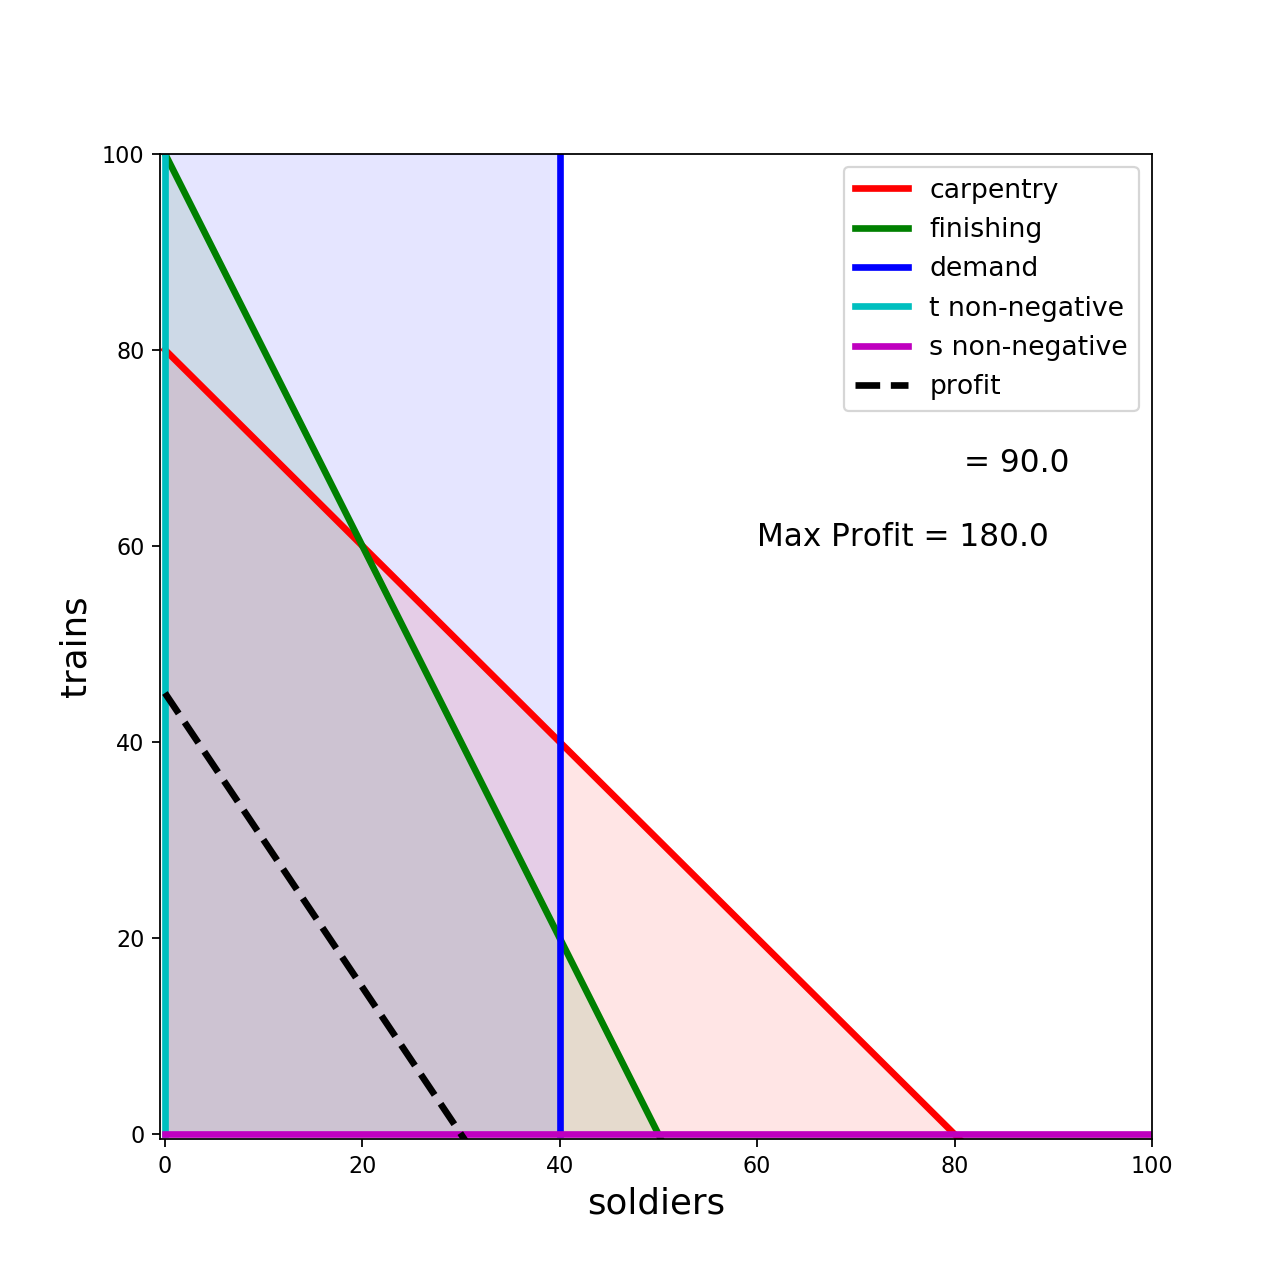

interactive(children=(FloatSlider(value=0.5, description='profScl', max=1.5, min=0.5, step=0.05), FloatSlider(…

In [1]:
# Run this to see widget, it isn't important to understand the code

%matplotlib notebook
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
from pyomo.environ import *

def GiapettoInteractiveGraph( coefSlider = False, constraintSlider = False):

    # create model instance
    model = ConcreteModel( name = "Giapetto" )

    # decision variables
    model.soldiers = Var( domain = NonNegativeReals )
    model.trains = Var( domain = NonNegativeReals )

    # objective function
    model.c1 = Param(default=3,mutable=True)
    model.c2 = Param(default=2,mutable=True)
    model.profit = Objective( expr = model.c1 * model.soldiers + model.c2 * model.trains, sense = maximize )

    # constraints
    model.b1 = Param(default=80,mutable=True)
    model.b2 = Param(default=100,mutable=True)
    model.b3 = Param(default=40,mutable=True)
    model.labor_hours = Constraint( expr = model.soldiers + model.trains <= model.b1 )
    model.finishing_hours = Constraint( expr = 2 * model.soldiers + model.trains <= model.b2 )
    model.soldier_demand = Constraint( expr = model.soldiers <= model.b3 )

    # solver
    solver = SolverFactory('glpk')


    # use seaborn to change the default graphics to something nicer
    # and set a nice color palette
    import seaborn as sns
    sns.set_palette('Set1')

    # create the plot object
    fig, ax = plt.subplots(figsize=(8,8)) # change to (6,6) to make figure smaller if needed
    s = np.linspace(0, 100)

    # add carpentry constraint: trains <= 80 - soldiers
    carpentry_line, = plt.plot(s, 80 - s, lw=3, label='carpentry',color='r')
    carpentry_fill = plt.fill_between(s, 0, 80 - s, alpha=0.1,color='r')

    # add finishing constraint: trains <= 100 - 2*soldiers
    finishing_line, = plt.plot(s, 100 - 2 * s, lw=3, label='finishing',color='g')
    finishing_fill = plt.fill_between(s, 0, 100 - 2 * s, alpha=0.1,color='g')

    # add demains constraint: soldiers <= 40
    demand_line, = plt.plot(40 * np.ones_like(s), s, lw=3, label='demand',color='b')
    demand_fill = plt.fill_betweenx(s, 0, 40, alpha=0.1,color='b')

    # add non-negativity constraints
    plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative',color='c')
    plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative',color='m')

    # level curve for profit P
    profit_line, = plt.plot(s, .5*180 - 1.5*s, 'k--', lw = 3, label = 'profit')

    # labels and stuff
    plt.xlabel('soldiers', fontsize=16)
    plt.ylabel('trains', fontsize=16)
    plt.xlim(-0.5, 100)
    plt.ylim(-0.5, 100)
    plt.legend(loc = 'upper right',fontsize=12)

    # additional elements
    # pt, = plt.plot(20, 60, 'k.', markersize = 20 )
    txt = plt.text( 81, 67.5, '= 180', fontsize = 14, zorder=10)
    txt2 = plt.text( 60, 60, 'Max Profit = 180', fontsize = 14)

    plt.show()

    def update( profScl = .5, c1 = 3, c2 = 2, b1 = 80, b2 = 100, b3 = 40):
        model.c1 = c1
        model.c2 = c2
        model.b1 = b1
        model.b2 = b2
        model.b3 = b3
        solver.solve(model)
        mxprofit = model.profit()
        profit = mxprofit*profScl
 
        profit_line.set_ydata((profit-c1*s)/(c2+.0001)) # hack to avoid div by 0
        ax.collections.clear()
        carpentry_line.set_ydata(b1-s)
        plt.fill_between(s, 0, b1 - s, alpha=0.1,color='r')
        finishing_line.set_ydata(b2-2*s)
        plt.fill_between(s, 0, b2 - 2 * s, alpha=0.1,color='g')
        demand_line.set_xdata(b3*np.ones_like(s))
        plt.fill_betweenx(s, 0, b3, alpha=0.1,color='b')    
        txt.set_text('= {:3.1f}'.format(profit) )
        txt2.set_text('Max Profit = {:3.1f}'.format(mxprofit) )
#        pt.set_xdata(model.soldiers())
#        pt.set_ydata(model.trains())
        fig.canvas.draw()

    if (coefSlider and constraintSlider):
        interact(update,profScl=(.5,1.5,.05),c1=(0,5,.5),c2=(0,5,.5),b1=(60,120),b2=(70,130),b3=(15,50)); 
    elif (coefSlider and not constraintSlider):
        interact(update,profScl=(.5,1.5,.05),c1=(0,5,.5),c2=(0,5,.5),b1=fixed(80),b2=fixed(100),b3=fixed(40));
    elif (not coefSlider and constraintSlider):
        interact(update,profScl=(.5,1.5,.05),c1=fixed(3),c2=fixed(2),b1=(75,85),b2=(95,105),b3=(35,45));
    else:
        interact(update,profScl=(.5,1.5,.05),c1=fixed(3),c2=fixed(2),b1=fixed(80),b2=fixed(100),b3=fixed(40));

GiapettoInteractiveGraph(True,True);

(a) Find and interpret the shadow price for the weekly carpentry hours. (**HW2.3a**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(b) Find and interpret the allowable range for the weekly finishing hours. (**HW2.3b**)

<font color = "blue"> *** 1 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(c) If everything else stays the same as in the initial problem, how far could the demand for toy soldiers drop before the demand becomes a sensitive parameter? (**HW2.3c**)

<font color = "blue"> *** 1 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(d) If everything else stayed the same, but the price of selling the soldier increased to \\$28.50, (**HW2.3d**)

    (i) what would be the maximum profit? 

<font color = "blue"> *** 1 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

    (ii) how many of each toy should be produced to achieve it,

<font color = "blue"> *** 1 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

    (iii) and what is the new shadow price for weekly carpentry hours?  Why is this the new shadow price?

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

# Textbook Problem 4.7-3

You are given the following linear programming problem: 

Maximize $Z = 4x_1 + 2x_2,$ 

subject to 

$
\begin{array}{rcrcr}
2x_1 & & & \leq & 16 \\
x_1 & + & 3x_2 & \leq & 17 \\
         &         & x_2 & \leq & 5 
\end{array}
$

and $x_1 \geq 0, x_2 \geq 0.$

(a) Solve this problem graphically and include a screenshot here. (**HW2.4a**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(b) Use graphical analysis to find the shadow prices for the
  resources.  Use PHPSimplex.com/en, DESMOS.com, or graph by hand.  Include a screenshot or image of your work, put it in the images folder and use an HTML image tag to include it in the notebook.  Make sure to clearly identify the shadow prices (**HW2.4b**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(c) Determine how many additional units of resource 1 would need to
increase the optimal value of $Z$ by 15. (**HW2.4c**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

# Textbook Problem 3.5-5

Fred Jonasson manages a family-owned farm. To supplement several food products grown on the farm, Fred also raises pigs for market. He now wishes to determine the quantities of the available types of feed (corn, tankage, and alfalfa) that should be given to each pig. Since pigs will eat any mix of these feed types, the objective is to determine which mix will meet certain nutritional requirements at a minimum cost. The number of units of each type of basic nutritional ingredient contained within a kilogram of each feed type is given in the following table, along with the daily nutritional requirements and feed costs:

<table>
    <tr>
        <th style="border-right:thin solid;border-bottom:thin solid;"> &nbsp; <br> Nutrional <br> Ingredient </th>
        <th style="border-bottom:thin solid;"> Kilogram <br> of<br> Corn </th>
        <th style="border-bottom:thin solid;"> Kilogram <br> of <br> Tankage </th>
        <th style="border-bottom:thin solid;"> Kilogram<br>of<br>Alfalfa</th>
        <th style="border-left: thin solid;border-bottom:thin solid;"> Minimum<br>Daily<br>Requirement </th>
    </tr>
    <tr>
        <td style="border-right:thin solid;"> Carbohydrates </td>
        <td> 90 </td>
        <td> 20 </td>
        <td> 40 </td>
        <td style="border-left:thin solid;"> 200 </td>
    </tr>
    <tr>
        <td style="border-right:thin solid;"> Protein </td>
        <td> 30 </td>
        <td> 80 </td>
        <td> 60 </td>
        <td style="border-left:thin solid;"> 180 </td>
    </tr>
    <tr>
        <td style="border-right:thin solid;"> Vitamins </td>
        <td> 10 </td>
        <td> 20 </td>
        <td> 60 </td>
        <td style="border-left:thin solid;"> 150 </td>
    </tr>        
    <tr>
        <td style="border-top:thin solid;border-right:thin solid"> Cost </td>
        <td style="border-top:thin solid;"> \$2.10 </td>
        <td style="border-top:thin solid;"> \$1.80 </td>
        <td style="border-top:thin solid;"> \$1.50 </td>
        <td style="border-left:thin solid; border-top:thin solid;"> &nbsp; </td>
    </tr>
</table>

(a) Formulate a linear programming model for this problem.  LaTeX or handwritten with picture. (**HW2.5a**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(b) Use Pyomo to solve this problem. Your solution should include all necessary code and inputs and it should produce formatted output.  For credit, you must use the abstract approach as we did in the lesson.

<font color = "blue"> *** 6 points -  answer in cell below *** (don't delete this cell) </font>

# Textbook Problem 3.4-15 Revisited

Oxbridge University maintains a powerful mainframe computer
  for research use by its faculty, Ph.D. students, and research
  associates. During all working hours, an operator must be available
  to operate and maintain the computer, as well as to perform some
  programming services. Beryl Ingram, the director of the computer
  facility, oversees the operation.  

  It is now the beginning of the
  fall semester, and Beryl is confronted with the problem of assigning
  different working hours to her operators. Because all the operators
  are currently enrolled in the university, they are available to work
  only a limited number of hours
  each day, as shown in the following table: 
  
  <img src="images/screen-problem5.png" width="440" height="250">
  
  There are six operators (four undergraduate students and two
  graduate students). They all have different wage rates because of
  differences in their experience with computers and in their pro-
  gramming ability. The above table shows their wage rates, along with
  the maximum number of hours that each can work each day.  

  Each
  operator is guaranteed a certain minimum number of hours per week
  that will maintain an adequate knowledge of the operation. This
  level is set arbitrarily at 8 hours per week for the undergraduate
  students (K. C., D. H., H. B., and S. C.) and 7 hours per week for
  the graduate students (K. S. and N. K.).

  The computer facility is to be open for operation from 8 A.M. to 10
  P.M. Monday through Friday with exactly one operator on duty during
  these hours. On Saturdays and Sundays, the computer is to be
  operated by other staff.  Because of a tight budget, Beryl has to
  minimize cost. She wishes to determine the number of hours she
  should assign to each operator on each day.

  Because of a tight budget, Beryl has to minimize cost. She wishes to
  determine the number of hours she should assign to each operator on
  each day.

(a) Formulate an abstract linear programming model for this problem that can be generalized to any number of workers and days.  This is very similar to the "Supply and Demand" self-assessment problem:
- "supply" is the weekly hours worked by each worker, but it's possible for workers to work more than the guaranteed minimum hours each week
- "demand" is the daily hours that must be staffed
- you'll need additional constraints that reflect that each worker has limited availability on each day, on some days they have zero availability

Include your mathematical model here.  You can typeset the model with LaTeX or include a clean, cropped picture of your handwritten equations. (**HW2.6a**)

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(b) Solve this model using Pyomo, coding the data and model separately as done, for example, in the "Supply and Demand" Self Assessment problem. For credit, you must use the abstract approach as in the lesson. Your solution should include all necessary code and inputs and it should produce formatted output. (**HW2.6b**)

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

(c) Produce the sensitivity report in Python.  (**HW2.6c**)

<font color = "blue"> *** 1 point -  answer in cell below *** (don't delete this cell) </font>

(d) Report and interpret the shadow price for H.B.'s available hours hours for Monday. (**HW2.6d**)

<font color = "blue"> *** 1 point -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(e) Report and interpret the activity range for H.B.'s available hours hours for Monday. (For constraints, the activity range in the Python/GLPK report is equivalent to the allowable range discussed in the textbook.) (**HW2.6e**)

<font color = "blue"> *** 1 point -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

# Textbook Problem 7.3-7 (parts)

This question is based on the material labeled "Personnel
Scheduling" beginning on page 57 of the textbook.  Table 3.19 is
reproduced here for convenience: 

<img src="images/problem5p5.png" width="640" height="450"> 

Management now is considering increasing the level of service
provided to customers by increasing one or more of the numbers in the
rightmost column of Table 3.19 for the minimum number of agents needed
in the various time periods. To guide them in making this decision,
they would like to know what impact this change would have on total
cost.  (*Note: the letters (a), (b), etc. do not match the letters in the textbook problem.*)

(a) Use Pyomo with the GLPK solver to generate the sensitivity report in preparation for addressing the following questions.  Your Pyomo solution should be written in a general way that can be applied to any number time periods and shifts (use the abstract approach).  In the cell below we've included the problem data to get you started.  Note that the "rows" in ```periods_covered``` allow you form the mimimum number of agents constraints.  For instance, based on the second "row" we know that the constraint for the 8am - 10am time period is $$ 1 x_{s1} + 1 x_{s2} + 0 x_{s3} + 0 x_{s4} + 0 x_{s5} \geq 79$$ because only agents in shifts 1 and 2 provide coverage for that time period.  (**HW2.7a**)

<font color = "blue"> *** 7 points -  answer in cell below *** (don't delete this cell) </font>

In [1]:
# data for problem 7.3-7
periods = [
    'p6_8', 'p8_10', 'p10_12', 'p12_14', 'p14_16', 'p16_18', 'p18_20',
    'p20_22', 'p22_24', 'p24_6'
]
shifts = ['s1', 's2', 's3', 's4', 's5']
daily_cost_per_agent = dict( zip( shifts, [170, 160, 175, 180, 195] ) )
min_agents_per_period = dict( zip( periods, [48, 79, 65, 87, 64, 73, 82, 43, 52, 15] ) )
                            
pc = [[1, 0, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 1, 0, 0],
     [0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 0, 1, 0],
     [0, 0, 0, 1, 1], [0, 0, 0, 0, 1]]
periods_covered = { periods[p]: dict(zip( shifts, pc[p][:])) for p in range(len(periods))}

# finish the code here:


(b) Which of the numbers in
the rightmost column of Table 3.19 can be increased without increasing
total cost? In each case, indicate how much it can be increased (if it
is the only one being changed) without increasing total cost. (**HW2.7b**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(c) For each of the other numbers, how much would the total cost increase per increase of 1 in the number? For each answer, indicate how much the number can be increased (if it is the only one being changed) before the answer is no longer valid.   (**HW2.7c**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>

(d) Do your answers in part (c) definitely remain valid if all the numbers considered in part (b) are simultaneously increased by one? (What percent of the allowable increase is an increase of 1 for each RHS? Consider Hillier p. 238)  (**HW2.7d**)

<font color = "blue"> *** 2 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
replace this text with answer, your answer should be green   
</font>